In [21]:
from torch.nn.functional import gumbel_softmax
import numpy as np
from torch import *
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [35]:
gumbel_softmax(d, tau=1).numpy().flatten()

array([0.00613775, 0.04084676, 0.08845273, 0.25141433, 0.61314845],
      dtype=float32)

array([0.14726308, 0.00988898, 0.8077844 , 0.02559457, 0.00946903],
      dtype=float32)

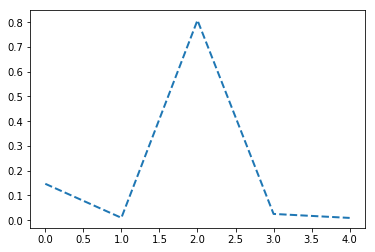

In [229]:
d = Tensor([[1, 2, 5, 2, 2]])
gumbel = gumbel_softmax(d, tau=1).numpy().flatten()
plt.plot([x for x in range(len(d[0]))], gumbel, '--', linewidth=2, markersize=12)
gumbel

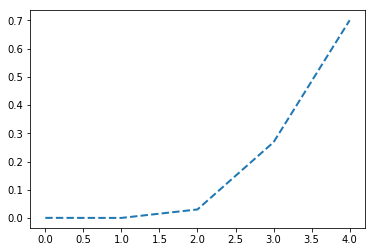

In [132]:
plt.plot([x for x in range(len(d[0]))], gumbel_softmax(d, tau=.5).numpy().flatten(), '--', linewidth=2, markersize=12)

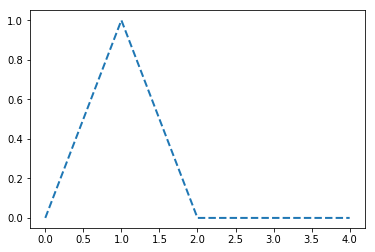

In [155]:
plt.plot([x for x in range(len(d[0]))], gumbel_softmax(d, tau=.1).numpy().flatten(), '--', linewidth=2, markersize=12)

In [42]:
gumbel_softmax(d, tau=.2).numpy().flatten()

array([2.1991761e-11, 5.4951834e-06, 7.7410404e-11, 9.3204198e-06,
       9.9998522e-01], dtype=float32)

In [96]:
import torch
gumbels = -torch.empty_like(d).exponential_().log()  # ~Gumbel(0,1)
gumbels

tensor([[ 0.8115, -0.6610,  0.4416, -0.3391,  0.5237]])

In [97]:
-torch.empty_like(d)

tensor([[-7.0065e-45, -0.0000e+00, -7.0065e-45, -0.0000e+00, -1.4013e-45]])

In [98]:
-torch.empty_like(d).exponential_()

tensor([[-1.2904e-03, -2.5155e+00, -7.5653e-01, -1.5940e-01, -3.7954e-01]])

In [99]:
-torch.empty_like(d).exponential_().log()

tensor([[3.2490, 1.4132, 0.4668, 0.7051, 1.3644]])

In [162]:
def gumbel(logits, tau=1, hard=False, eps=1e-10, dim=-1):
    gumbels = -torch.empty_like(logits).exponential_().log()  # ~Gumbel(0,1)
    gumbels = (logits) / tau  # ~Gumbel(logits,tau)
    y_soft = gumbels.softmax(dim)
    return y_soft
gumbel(d, tau=0.5)

tensor([[3.2773e-04, 2.4216e-03, 1.7893e-02, 2.4216e-03, 9.7694e-01]])

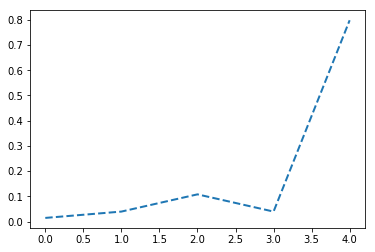

In [211]:
plt.plot([x for x in range(len(d[0]))], gumbel(d, tau=1).numpy().flatten(), '--', linewidth=2, markersize=12)

In [218]:
u = Tensor([0, 0, 1, 0, 0])
u = u + torch.torch.FloatTensor(u.shape).uniform_(0, 0.2)
u = u / u.sum()
u

tensor([0.1069, 0.0967, 0.6709, 0.0971, 0.0284])

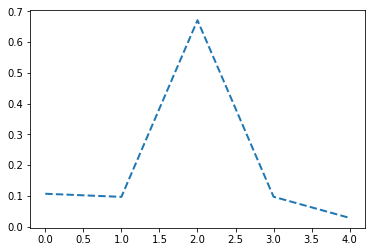

In [219]:
plt.plot(u.numpy(), '--', linewidth=2)

In [183]:
torch.distributions.uniform(0, 0.2)

TypeError: 'module' object is not callable

In [187]:
torch.FloatTensor(u.shape).uniform_(0, 0.2)

NameError: name 'u' is not defined